<a href="https://colab.research.google.com/github/vincentv1345/MachineLearningProjects/blob/main/neural_network_newsdata_verapen_vincent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  This jupyter notebook is prepared by Vincent Verapen.

## 1. Load Data and perform basic EDA

###. import libraries necessary libraries and perform necessariy nltk download operations

In [ ]:
import pandas as pd
import nltk   
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

In [ ]:
nltk.download('wordnet') # we will use wordnet lemmatizer
nltk.download('averaged_perceptron_tagger') #to be used for tagger
nltk.download('punkt') 
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### II. As part of understanding how the columns are separated, read the file using the open function and create a list and show the first 10 items in the list

In [ ]:
#Used with open to covert the csv to a list and found out that the data is tsv so when i would read it into a df i should make sure its seperated by tabs
import csv
data = []
with open('news.csv', newline='',) as f:
    reader = csv.reader(f, delimiter = '\t')
    data = list(reader)

print(data[:10])

[['title', 'text', 'subject', 'date', 'target'], ['As U.S. budget fight looms, Republicans flip their fiscal script', 'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, whi

In [ ]:
#Read in csv through read csv since i understood how to load the data through a datafram and wasn't sure if I needed to still use open() anymore
df = pd.read_csv("news.csv", sep = '\t', names = ["title", "text", "subject", "date", "target"])

In [ ]:
df

,title,text,subject,date,target
0,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [ ]:
#Removes the first row which ocntains duplicate title text subject data and target column names
df = df.iloc[1: , :]

In [ ]:
df

,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


###. Prints out top 5 and last 5 rows of df

In [ ]:
df.head()

,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.tail()

,title,text,subject,date,target
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
44898,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
df.describe()

,title,text,subject,date,target
count,44898,44898,44898,44898,44898
unique,38729,38646,8,2397,2
top,Factbox: Trump fills top jobs for his administ...,,politicsNews,"December 20, 2017",0
freq,14,627,11272,182,23481


### Checks for any null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 1 to 44898
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [ ]:
df.isna().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

#Adds a countplot of the subject column and all the different types of subjects

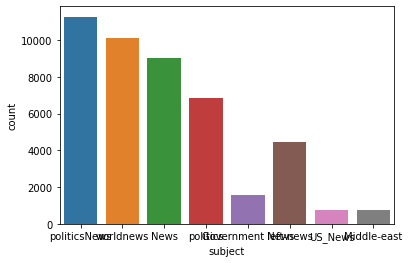

In [ ]:
import seaborn as sns

ax = sns.countplot(x=df["subject"], data=df)

### Plots real news vs fake news

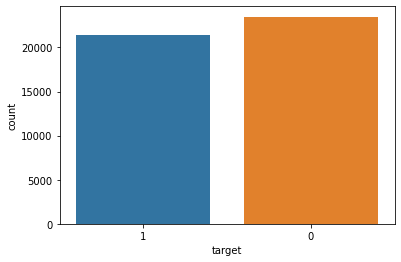

In [ ]:
ax2 = sns.countplot(x=df['target'], data = df)

###Created 2 new dfs in order to seperate false from true values

In [ ]:
df2True = df.drop(df[df['target'] != '1'].index)
df2False = df[df.target != '1']

In [ ]:
df2True

,title,text,subject,date,target
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21413,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21414,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21415,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21416,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [ ]:
df2False

,title,text,subject,date,target
21418,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
21419,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
21420,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
21421,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
21422,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


###Created Word Clouds using these true and fake dfs of news

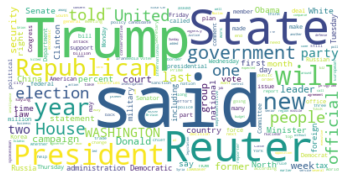

In [ ]:
text = " ".join(cat for cat in df2True.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

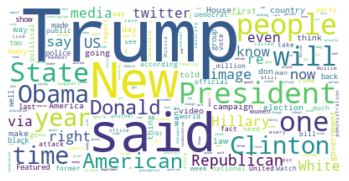

In [ ]:
text = " ".join(cat for cat in df2False.text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Combined Columns using lambda and .join after applying it to the list of columns and created a new column with the combined string called AllText as specified in the instructions

In [ ]:
columns = ['title', 'text', 'subject']
df['AllText'] = df[columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,title,text,subject,date,target,AllText
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,McPain: John McCain Furious That Iran Treated ...
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,How to Blow $700 Million: Al Jazeera America F...


###Save copy of current df before drop to use later

In [ ]:
df_saved = df.copy()

###Drop unecessary colummns

In [ ]:
df = df.drop(['title', 'text', 'subject', 'date'], axis = 1)

###Get length of the all AllText rows

In [ ]:
df['length'] = df['AllText'].str.len()

In [ ]:
df

,target,AllText,length
1,1,"As U.S. budget fight looms, Republicans flip t...",4735
2,1,U.S. military to accept transgender recruits o...,4153
3,1,Senior U.S. Republican senator: 'Let Mr. Muell...,2861
4,1,FBI Russia probe helped by Australian diplomat...,2532
5,1,Trump wants Postal Service to charge 'much mor...,5285
...,...,...,...
44894,0,McPain: John McCain Furious That Iran Treated ...,3309
44895,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,1776
44896,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,25161
44897,0,How to Blow $700 Million: Al Jazeera America F...,2763


In [ ]:
df2True = df.drop(df[df['target'] != '1'].index)
df2False = df[df.target != '1']

###Created two histograms to plot distribution of lengths

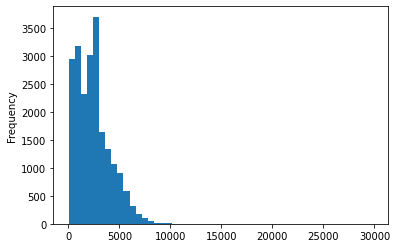

In [ ]:
df2True['length'].plot(bins=50, kind='hist')

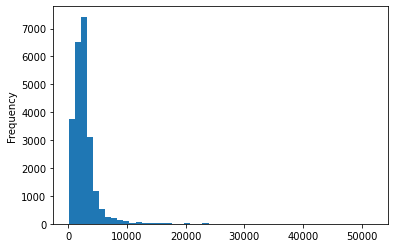

In [ ]:
df2False['length'].plot(bins=50, kind='hist')

###XIII. Write in Words: What is TFIDF? How to create bag of words using sklearn? And how to generate TFIDF for the bag of words?
##### TFIDF stands for Ter Frequency Inverse Document Frequency and is used to give measure to a word that indicates how important the word is based off of the use of that word in all other documents

##2. Test Train Split X and Y

###Perform Test train split on model

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('target', axis = 1)
y = df.drop(['AllText', 'length'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['AllText'], y, test_size = 0.2, random_state=101)

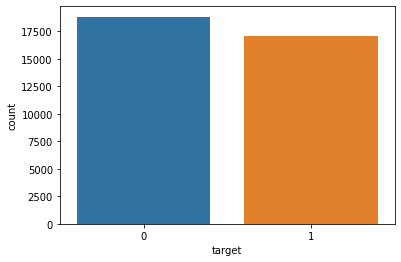

In [ ]:
ax3 = sns.countplot(x=y_train['target'], data = y_train)

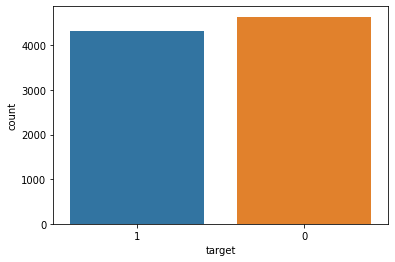

In [ ]:
ax4 = sns.countplot(x=y_test['target'], data = y_train)

##3. Training and Testing Fake news classifier using MultinomialNB

In [ ]:
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import string
#Text process function that we were asked to use for the pipelines which combines the words and does the tokenization process, etc.
def text_process(mess):

    stopwordList = stopwords.words('english')

    mess = [char for char in mess if char not in string.punctuation]
    mess = ''.join(mess)

    words = nltk.word_tokenize(mess)
    words = [t for t in words if t not in stopwordList]
    words = [stemmer.stem(w.lower()) for w in words]

    return words

###Initialize CountVectorizer classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['AllText'])

In [ ]:
messages_bow = bow_transformer.transform(df['AllText'])

###.Initialize TfidfTransformer classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)

###Import pipeline as well as initialize classifiers based off of google colab using bow tfidf and multinomialNB Classifier

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
#Used pipeline From 
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

###Fit on My training data

In [ ]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc814abe4d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

###Predict MultinomialNB on my current pipeline

In [ ]:
predictions = pipeline.predict(X_test)

###Get Confusion Matrix and classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4658
           1       0.95      0.96      0.96      4322

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [ ]:
 from sklearn.metrics import confusion_matrix
confusion_matrix(predictions, y_test)

array([[4459,  199],
       [ 186, 4136]])

###IV. Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.
####. it seems  very reliable due to the fact that the scores are all 96 and it seems to me that the confusion matrix has a 0.4% misclassification rate although it could potentially be overfitted with all the scores being consistent it doesn't seem like it is

###V. Copy a part of any news of your choice from a news website and then use the model to predict whether is it true or not. 

In [ ]:
#. Message gotten from website: https://www.cnn.com/2022/04/29/politics/hannity-text-messages-meadows-trump-white-house/index.html
newsMessage = 'The texts also show the two men debating Trumps strategy to challenge the election, complaining about Fox, and plotting about what to do after Trump left office -- including possibly working together.'
pipeline.predict([newsMessage])

array(['0'], dtype='<U1')

##4. Training and Testing a deep Neural Network

###Initialize MLP sklearn Neural Network Classifier

In [ ]:
#Used pipeline based off google colab with MLPClassifier
from sklearn.neural_network import MLPClassifier
pipeline2 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,4), random_state=0, early_stopping=True, verbose=2)), 
])

###Fit on my training data

In [ ]:
pipeline2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.23733085
Validation score: 0.994432
Iteration 2, loss = 0.01767969
Validation score: 0.996102
Iteration 3, loss = 0.00573129
Validation score: 0.996381
Iteration 4, loss = 0.00305219
Validation score: 0.996938
Iteration 5, loss = 0.00204406
Validation score: 0.996938
Iteration 6, loss = 0.00159969
Validation score: 0.997216
Iteration 7, loss = 0.00134259
Validation score: 0.996938
Iteration 8, loss = 0.00117385
Validation score: 0.996938
Iteration 9, loss = 0.00105284
Validation score: 0.996938
Iteration 10, loss = 0.00096052
Validation score: 0.996938
Iteration 11, loss = 0.00088692
Validation score: 0.996938
Iteration 12, loss = 0.00082531
Validation score: 0.997216
Iteration 13, loss = 0.00077312
Validation score: 0.996938
Iteration 14, loss = 0.00072713
Validation score: 0.996938
Iteration 15, loss = 0.00068621
Validation score: 0.996938
Iteration 16, loss = 0.00064915
Validation score: 0.996938
Iteration 17, loss = 0.00061547
Validation score: 0.996938
Valida

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc814abe4d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 4),
                               random_state=0, verbose=2))])

###Predict on my neural network pipeline with X_test data

In [ ]:
predictions2 = pipeline2.predict(X_test)

In [ ]:
print(classification_report(predictions2,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4625
           1       1.00      0.99      0.99      4355

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [ ]:
confusion_matrix(y_test, predictions2)

array([[4612,   33],
       [  13, 4322]])

### V. Discuss the performance like how good the model is overall, how good is it in predicting fake news, and how good is it in predicting true news.
####. It appears that a neural network is far better at predicting something vs Multinomial NB due to a 3% increase in the accurracy. Although it is still unknown if the data is being overfitted but for the most part with better scores everywhere The MLPClassifier from sklearn NeuralNetwork is better 

In [ ]:
pipeline2.predict([newsMessage])

array(['1'], dtype='<U1')

###VII. Discuss any difference in performance between this model and NB model
####So it appears that in this model predicted true vs the NB Model which predicted false therefore it seems to me that the second model is better because although the first model predicted false the second model predicted it was true and it comes from a new source that is well-know so the 3% actually mattered.

##. Extra Credit

In [ ]:
df_saved

,title,text,subject,date,target,AllText
1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1,"As U.S. budget fight looms, Republicans flip t..."
2,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1,U.S. military to accept transgender recruits o...
3,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1,Senior U.S. Republican senator: 'Let Mr. Muell...
4,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1,FBI Russia probe helped by Australian diplomat...
5,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1,Trump wants Postal Service to charge 'much mor...
...,...,...,...,...,...,...
44894,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0,McPain: John McCain Furious That Iran Treated ...
44895,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44896,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44897,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
df_saved2 = df_saved.drop(['target', 'title', 'text', 'date'], axis = 1)

In [ ]:
df_saved2

,subject,AllText
1,politicsNews,"As U.S. budget fight looms, Republicans flip t..."
2,politicsNews,U.S. military to accept transgender recruits o...
3,politicsNews,Senior U.S. Republican senator: 'Let Mr. Muell...
4,politicsNews,FBI Russia probe helped by Australian diplomat...
5,politicsNews,Trump wants Postal Service to charge 'much mor...
...,...,...
44894,Middle-east,McPain: John McCain Furious That Iran Treated ...
44895,Middle-east,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44896,Middle-east,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44897,Middle-east,How to Blow $700 Million: Al Jazeera America F...


In [ ]:
y2 = df_saved2.drop('AllText', axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_saved2['AllText'], y2, test_size = 0.2, random_state=101)

###Used MLPClassifier for my classifier again as in the previous question

In [ ]:
pipeline3 = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)), 
    ('tfidf', TfidfTransformer()), 
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,3), random_state=0, early_stopping=True, verbose=2, n_iter_no_change=5)), 
])
pipeline3.fit(X_train2, y_train2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1.70677705
Validation score: 0.507517
Iteration 2, loss = 0.86496136
Validation score: 0.778118
Iteration 3, loss = 0.45936224
Validation score: 0.791481
Iteration 4, loss = 0.33165725
Validation score: 0.796771
Iteration 5, loss = 0.26619140
Validation score: 0.795935
Iteration 6, loss = 0.22045239
Validation score: 0.796771
Iteration 7, loss = 0.19088690
Validation score: 0.797884
Iteration 8, loss = 0.17090823
Validation score: 0.795657
Iteration 9, loss = 0.15201934
Validation score: 0.792595
Iteration 10, loss = 0.13631428
Validation score: 0.795100
Iteration 11, loss = 0.11991550
Validation score: 0.792595
Iteration 12, loss = 0.10551588
Validation score: 0.797606
Iteration 13, loss = 0.09251756
Validation score: 0.794265
Validation score did not improve more than tol=0.000100 for 5 consecutive epochs. Stopping.


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fc814abe4d0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier',
                 MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 3),
                               n_iter_no_change=5, random_state=0,
                               verbose=2))])

In [ ]:
predictions3 = pipeline3.predict(X_test2)

In [ ]:
print(classification_report(predictions3,y_test2))

                 precision    recall  f1-score   support

Government News       0.01      0.29      0.01         7
    Middle-east       0.07      0.21      0.10        52
           News       0.95      0.97      0.96      1757
        US_News       0.66      0.42      0.51       244
      left-news       0.30      0.36      0.33       744
       politics       0.64      0.47      0.54      1826
   politicsNews       0.98      0.98      0.98      2322
      worldnews       0.98      0.97      0.97      2028

       accuracy                           0.80      8980
      macro avg       0.57      0.58      0.55      8980
   weighted avg       0.83      0.80      0.81      8980



####. So for the classification report it seems relatively accurate with an 80% accuraccy rate. It seems accurate in predicting the news because it correctly shows that the majority of news is world news and politics news as it was when input. The weaknesses for this model are that there aren't

###Print confusion Matrix

In [ ]:
confusion_matrix(y_test2, predictions3)

array([[   2,    1,    2,    0,   24,  243,    8,   10],
       [   0,   11,    0,  142,    5,    6,    0,    4],
       [   0,    0, 1709,    0,   25,   67,    3,    0],
       [   0,   40,    0,  102,    6,    2,    0,    4],
       [   1,    0,   14,    0,  268,  615,    1,    3],
       [   3,    0,   31,    0,  416,  852,   14,   11],
       [   0,    0,    1,    0,    0,   10, 2285,   36],
       [   1,    0,    0,    0,    0,   31,   11, 1960]])